In [5]:
!pip freeze
!pip3 install numpy
!pip3 install pandas
!pip3 install sklearn
!pip3 install matplotlib
!pip3 install pydotplus
!pip3 install six

absl-py==1.2.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.2.0
alabaster==0.7.12
albumentations==1.2.1
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
asynctest==0.13.0
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.1.0
audioread==3.0.0
autograd==1.5
Babel==2.10.3
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.8
bokeh==2.3.3
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==2.0.8
certifi==2022.9.24
cffi==1.15.1
cftime==1.6.2
chardet==3.0.4
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==1.5.0
cmake==3.22.6
cmdstanpy==1.0.7
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.2
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.2.1
cycler==0.11.0
cymem==2.0.6
Cython==0.29.32
daft==0.0.4
dask==2022.2.0
datascience==0.17.5
debugpy==1.0.0
decorator==4.4.

# Problem 7: Old-growth forests

In [6]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# preparing data for use
url = 'https://raw.githubusercontent.com/f1nn3g4n/SENG474Test/ad161e4c364f92adc9730fe6c06edd2769b9f355/elections_clean.csv'
df = pd.read_csv(url, sep='\t', index_col=0)
# help from https://datascienceparichay.com/article/randomly-shuffle-pandas-dataframe-rows/#:~:text=There%20are%20a%20number%20of%20ways%20to%20shuffle,sklearn.utils%20to%20shuffle%20your%20dataframe.%20Here%E2%80%99s%20the%20syntax%3A
df = pd.get_dummies(df)

df_train, df_test = train_test_split(df, test_size=0.3, random_state=1)
train = df_train.drop('democrat', axis=1)
train_label = df_train['democrat']
test = df_test.drop('democrat', axis=1)
test_label = df_test['democrat']

In [7]:
# making forest
# help from https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/
# and https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
x = list(range(1, 51))
train_errors = []
test_errors = []
for estimators in x:
  clf = RandomForestClassifier(n_estimators = estimators, max_depth = 3)
  clf.fit(train, train_label)
  train_error = 1-clf.score(train, train_label)
  test_error = 1-clf.score(test, test_label)
  train_errors.append(train_error)
  test_errors.append(test_error)

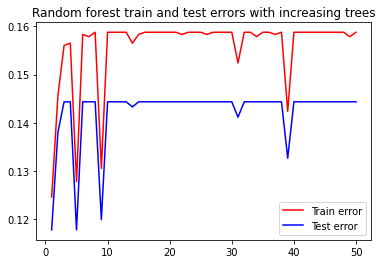

In [8]:
import matplotlib.pyplot as plt

plt.plot(x, train_errors, c="r", label="Train error")
plt.plot(x, test_errors, c="b", label="Test error")
plt.title("Random forest train and test errors with increasing trees")
plt.legend()
plt.show()

With the above training and testing error, the random forest classifier is not better than the ID3 implementations (ID3 scratch: 0.1284 test err, ID3 sklearn: 0.1114 test err). However, the random forest classifier did run noticeably faster for me.